In [107]:
import networkx as nx
import pandas as pd

In [108]:
%matplotlib inline

In [109]:
sum_ingr_combs_by_year = pd.read_csv('out/ingr_combs.csv')
sum_ingr_combs_by_year.set_index('year', inplace=True)

In [114]:
sum_ingr_combs_by_year.loc[2005].sort_values(ascending=False).head()

('i_agua', 'i_sal')                 41
('i_agua', 'i_hoja de gelatina')    39
('i_azúcar', 'i_agua')              38
('i_agua', 'i_aceite de oliva')     31
('i_aceite de oliva', 'i_sal')      25
Name: 2005, dtype: int64

In [115]:
sum_ingr_combs_by_year.loc[1987].sort_values(ascending=False).head()

('i_aceite de oliva', 'i_sal')          13
('i_aceite de oliva', 'i_perifollo')     9
('i_sal', 'i_perifollo')                 9
('i_pimienta negra', 'i_sal')            7
('i_aceite', 'i_sal')                    7
Name: 1987, dtype: int64

In [ ]:
Calcular tb los porcentajes sobre el numero de recetas de cada año

In [104]:
sum_tech_combs_by_year = pd.read_csv('out/tech_combs.csv')
sum_tech_combs_by_year.set_index('year', inplace=True)

In [105]:
sum_ingr_tech_combs_by_year = pd.read_csv('out/ingr_tech_combs.csv')
sum_ingr_tech_combs_by_year.set_index('year', inplace=True)

In [106]:
sum_ingr_combs_by_year.head()

,"('i_consomé de tucuppí', 'i_agua')","('i_consomé de tucuppí', 'i_sal')","('i_consomé de tucuppí', 'i_hoja de gelatina')","('i_consomé de tucuppí', 'i_aceite de girasol')","('i_consomé de tucuppí', 'i_perifollo')","('i_anchoas en salazón', 'i_nata')","('i_anchoas en salazón', 'i_azúcar')","('i_anchoas en salazón', 'i_agua')","('i_anchoas en salazón', 'i_agar-agar en polvo')","('i_anchoas en salazón', 'i_limón')",...,"('i_perifollo', 'i_pistacho verde crudo')","('i_perifollo', 'i_pomelo rosa')","('i_perifollo', 'i_piel de sardina')","('i_perifollo', 'i_aceite de oronja')","('i_perifollo', 'i_juliana de pata de ternera')","('i_perifollo', 'i_menta fresca')","('i_perifollo', 'i_líquido')","('i_perifollo', 'i_aceite de ajo')","('i_perifollo', 'i_café')","('i_perifollo', 'i_calabaza')"
year,,,,,,,,,,,,,,,,,,,,,
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [106]:
sum_ingr_combs_by_year.head()

,"('i_consomé de tucuppí', 'i_agua')","('i_consomé de tucuppí', 'i_sal')","('i_consomé de tucuppí', 'i_hoja de gelatina')","('i_consomé de tucuppí', 'i_aceite de girasol')","('i_consomé de tucuppí', 'i_perifollo')","('i_anchoas en salazón', 'i_nata')","('i_anchoas en salazón', 'i_azúcar')","('i_anchoas en salazón', 'i_agua')","('i_anchoas en salazón', 'i_agar-agar en polvo')","('i_anchoas en salazón', 'i_limón')",...,"('i_perifollo', 'i_pistacho verde crudo')","('i_perifollo', 'i_pomelo rosa')","('i_perifollo', 'i_piel de sardina')","('i_perifollo', 'i_aceite de oronja')","('i_perifollo', 'i_juliana de pata de ternera')","('i_perifollo', 'i_menta fresca')","('i_perifollo', 'i_líquido')","('i_perifollo', 'i_aceite de ajo')","('i_perifollo', 'i_café')","('i_perifollo', 'i_calabaza')"
year,,,,,,,,,,,,,,,,,,,,,
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [106]:
sum_ingr_combs_by_year.head()

,"('i_consomé de tucuppí', 'i_agua')","('i_consomé de tucuppí', 'i_sal')","('i_consomé de tucuppí', 'i_hoja de gelatina')","('i_consomé de tucuppí', 'i_aceite de girasol')","('i_consomé de tucuppí', 'i_perifollo')","('i_anchoas en salazón', 'i_nata')","('i_anchoas en salazón', 'i_azúcar')","('i_anchoas en salazón', 'i_agua')","('i_anchoas en salazón', 'i_agar-agar en polvo')","('i_anchoas en salazón', 'i_limón')",...,"('i_perifollo', 'i_pistacho verde crudo')","('i_perifollo', 'i_pomelo rosa')","('i_perifollo', 'i_piel de sardina')","('i_perifollo', 'i_aceite de oronja')","('i_perifollo', 'i_juliana de pata de ternera')","('i_perifollo', 'i_menta fresca')","('i_perifollo', 'i_líquido')","('i_perifollo', 'i_aceite de ajo')","('i_perifollo', 'i_café')","('i_perifollo', 'i_calabaza')"
year,,,,,,,,,,,,,,,,,,,,,
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [51]:
from collections import Counter
qq=[]
for c in sum_ingr_combs_by_year.columns:
    ss=sum_ingr_combs_by_year[c].sum()
    qq.append(ss)
    if ss>=100:
        print(c)
c=Counter(qq)

('i_nata', 'i_azúcar')
('i_nata', 'i_agua')
('i_nata', 'i_nata líquida')
('i_gelatina', 'i_agua')
('i_gelatina', 'i_hoja de gelatina')
('i_azúcar', 'i_leche')
('i_azúcar', 'i_agua')
('i_azúcar', 'i_jarabe')
('i_azúcar', 'i_limón')
('i_azúcar', 'i_aceite de oliva')
('i_azúcar', 'i_sal')
('i_azúcar', 'i_hoja de gelatina')
('i_azúcar', 'i_salsa')
('i_azúcar', 'i_nata líquida')
('i_azúcar', 'i_mantequilla')
('i_azúcar', 'i_jarabe base')
('i_azúcar', 'i_glucosa')
('i_leche', 'i_agua')
('i_pimienta negra', 'i_aceite de oliva')
('i_pimienta negra', 'i_sal')
('i_agua', 'i_limón')
('i_agua', 'i_aceite')
('i_agua', 'i_n|2o')
('i_agua', 'i_aceite de oliva')
('i_agua', 'i_sal')
('i_agua', 'i_hoja de gelatina')
('i_agua', 'i_salsa')
('i_agua', 'i_nata líquida')
('i_agua', 'i_mantequilla')
('i_agua', 'i_jarabe base')
('i_agua', 'i_glucosa')
('i_agua', 'i_aceite de girasol')
('i_aceite', 'i_aceite de oliva')
('i_aceite', 'i_sal')
('i_aceite de oliva', 'i_sal')
('i_aceite de oliva', 'i_hoja de gelatin

In [50]:
c

Counter({1: 8899,
         2: 3299,
         3: 1714,
         4: 1209,
         5: 791,
         6: 528,
         7: 426,
         8: 331,
         9: 258,
         10: 200,
         11: 173,
         12: 169,
         13: 139,
         14: 117,
         15: 96,
         16: 94,
         17: 69,
         18: 69,
         19: 65,
         20: 59,
         21: 60,
         22: 44,
         23: 51,
         24: 40,
         25: 41,
         26: 24,
         27: 23,
         28: 31,
         29: 22,
         30: 28,
         31: 25,
         32: 16,
         33: 19,
         34: 15,
         35: 17,
         36: 10,
         37: 12,
         38: 20,
         39: 13,
         40: 12,
         41: 9,
         42: 6,
         43: 10,
         44: 7,
         45: 8,
         46: 10,
         47: 9,
         48: 4,
         49: 9,
         50: 8,
         51: 7,
         52: 3,
         53: 5,
         54: 8,
         55: 4,
         56: 5,
         57: 5,
         58: 9,
         59: 7,
     

In [81]:
g = nx.MultiGraph()
for i, x in sum_ingr_combs_by_year.iterrows():
    i = int(i)
    for j, y in x.iteritems():
        if y >= 10:
            y = int(y)
            a = eval(j)[0]
            b = eval(j)[1]
            if a not in g:
                g.add_node(a, weight=0)
            if b not in g:
                g.add_node(b, weight=0)
            g.node[a]['weight'] += 1
            g.node[b]['weight'] += 1
            g.add_edge(a, b, year=i, weight=y)

In [82]:
g.number_of_nodes()

76

In [83]:
g.number_of_edges()

646

In [84]:
nx.write_gexf(g,'out/g.gexf')

/home/antonio/.virtualenvs/myvirtualenv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/antonio/.virtualenvs/myvirtualenv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/antonio/.virtualenvs/myvirtualenv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/antonio/.virtualenvs/myvirtualenv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be con

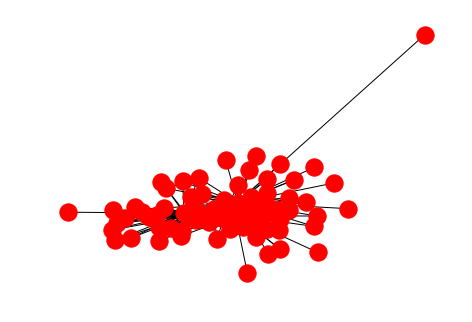

In [100]:
nx.draw(g)